In [14]:
import numpy as np

In [15]:
# load the data files
data = np.load('data/data.npy')
target = np.load('data/target.npy')

In [16]:
print(data.shape, target.shape)

(167, 2500) (167,)


In [17]:
from sklearn.svm import SVC # importing the SVm
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=132, whiten=True, random_state=42)
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

In [18]:
# splitting to train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [19]:
# train the model
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=132, random_state=42, whiten=True)),
                ('svc', SVC())])

In [20]:
# Get predictions
y_predic = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predic)
print(acc)

0.8235294117647058


In [22]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_predic, target_names=['Bill Gates', 'Elon Musk', 'Steve Jobs'])

print(cls_report)

              precision    recall  f1-score   support

  Bill Gates       1.00      0.40      0.57         5
   Elon Musk       0.80      0.57      0.67         7
  Steve Jobs       0.81      1.00      0.90        22

    accuracy                           0.82        34
   macro avg       0.87      0.66      0.71        34
weighted avg       0.84      0.82      0.80        34



In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_predic)
print(matrix)

[[ 2  1  2]
 [ 0  4  3]
 [ 0  0 22]]


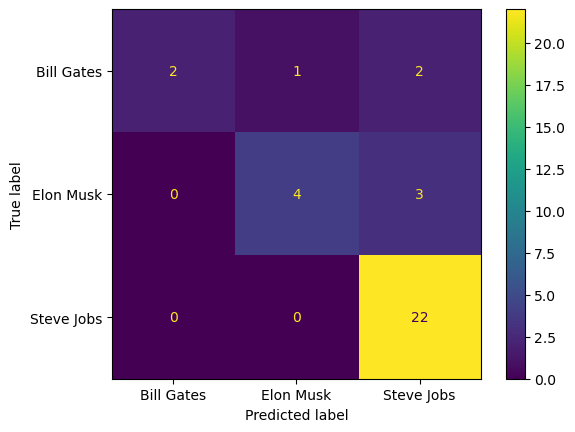

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Bill Gates', 'Elon Musk', 'Steve Jobs'])
disp.plot()

In [25]:
import joblib

joblib.dump(model, 'data/SVM-Face_Recognition.sav')

['data/SVM-Face_Recognition.sav']